In [1]:
!pip install pandas_profiling

  Stored in directory: C:\Users\Kanris\AppData\Local\pip\Cache\wheels\9b\c9\f1\4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Stored in directory: C:\Users\Kanris\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
  Stored in directory: C:\Users\Kanris\AppData\Local\pip\Cache\wheels\53\87\68\294a9e88d82e395b38571df18f7cb71e9ab51cedae77dd6f31
  Stored in directory: C:\Users\Kanris\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\Kanris\AppData\Local\pip\Cache\wheels\c4\57\cc\5f58206efb00418d4dcae8d08a3cb40627778ea29622f664c6
  Stored in directory: C:\Users\Kanris\AppData\Local\pip\Cache\wheels\57\4e\e8\bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Stored in directory: C:\Users\Kanris\AppData\Local\pip\Cache\wheels\f0\96\9b\1f8892a707d17095b5a6eab0275da9d39e68e03a26aee2e726
  Stored in directory: C:\Users\Kanris\AppData\Local\pip\Cache\wheels\11\94\81\31296945554

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Kanris/Desktop/дипл2/Итоговое задание/taxi.csv')

In [3]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


Целевая метка driver_response

In [4]:
data.info() #проверка на пропущеные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
offer_gk,100000.0,566218.928650,325935.980081,4.0,285555.250000,565671.500000,848719.750000,1.130355e+06
weekday_key,100000.0,3.159860,2.054222,0.0,1.000000,3.000000,5.000000,6.000000e+00
hour_key,100000.0,13.827790,7.306496,0.0,8.000000,16.000000,20.000000,2.300000e+01
driver_gk,100000.0,3446.376360,2038.738677,14.0,1421.000000,3506.500000,5242.000000,6.806000e+03
order_gk,100000.0,460867.012910,266064.989530,18.0,229178.500000,462420.000000,690894.000000,9.203440e+05
driver_latitude,100000.0,55.700824,2.135903,-1.0,55.708651,55.772904,55.960667,5.617410e+01
driver_longitude,100000.0,37.492292,1.454640,-1.0,37.413497,37.533664,37.624113,3.828055e+01
origin_order_latitude,100000.0,55.772440,0.665985,-1.0,55.708032,55.772561,55.962000,5.631112e+01
origin_order_longitude,100000.0,37.541637,0.467758,-1.0,37.407117,37.532537,37.624358,3.824361e+01
distance_km,100000.0,18.393518,41.129296,-1.0,-1.000000,10.411500,30.665250,5.234283e+03


#### Отрицательные значения широты и долготы водителя и заказа, расстояния и длительности требуют отдельного анализа
driver_latitude, 
driver_longitude, 
origin_order_latitude, 
origin_order_longitude, 
distance_km, 
duration_min

#### расстояние и длительность 5234 и 3958 соответственно выглядат необычно много на фоне основных значений

#### offer_gk минимальное значение 4 на фоне оставшихся значений выглядит странно ( 25% с 285 555.25), аналдогично  с offer_gk и order_gk (так же подозрительно маленькие значения на фоне остальных) 
#### дни недели начинаются с 0 и заканчиваются 6 ( можем подвинуть на +1 для адекватного восприятия)


(array([1.4000e+02, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

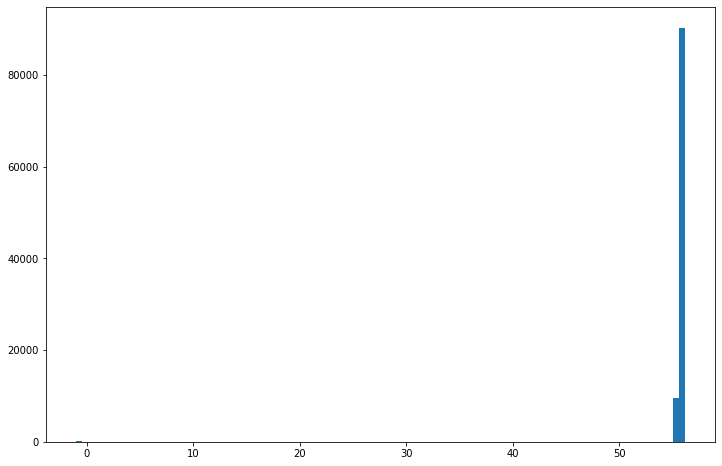

In [6]:
plt.figure(figsize=(12,8))
plt.hist(data['driver_latitude'],bins=100)

In [7]:
checkdata = data[data['driver_latitude'] <=0]

In [8]:
checkdata['driver_latitude'].value_counts()

-1.0    140
 0.0      1
Name: driver_latitude, dtype: int64

In [9]:
checkdata

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
565,638186,5,14,6272,817074,-1.0,-1.0,55.908664,37.597781,-1.000,-1.00,Standard,business,1
2111,567790,1,12,6792,820788,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2129,302376,1,1,6792,548327,-1.0,-1.0,55.415361,37.898917,83.923,81.35,Standard,business,1
2137,427612,6,21,6792,32158,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2142,202875,6,3,6792,346671,-1.0,-1.0,55.415361,37.898917,70.529,65.00,Standard,business,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81694,698969,6,6,2470,862514,-1.0,-1.0,55.699097,37.317988,41.576,43.55,Standard,private,1
83631,1077757,1,7,5578,62551,-1.0,-1.0,55.600737,37.539690,-1.000,-1.00,Delivery,business,1
85335,75929,5,14,468,776944,-1.0,-1.0,55.387756,37.549058,-1.000,-1.00,Standard,business,1
89970,1110601,6,13,259,135435,-1.0,-1.0,55.962322,37.407117,-1.000,-1.00,Standard,business,1


#### отрицательные значения и равные "0" значения 'driver_latitude' можем классифицировать как выброс( возможно ошибка GPS Нафигации), удаляем из сета

In [10]:
data = data[data['driver_latitude'] >0]

In [11]:
data.describe().T # заодно убрали отрицательные значения driver_longitude

,count,mean,std,min,25%,50%,75%,max
offer_gk,99859.0,566181.342643,325936.130692,4.000000,285511.500000,565589.000000,848677.500000,1.130355e+06
weekday_key,99859.0,3.160096,2.054446,0.000000,1.000000,3.000000,5.000000,6.000000e+00
hour_key,99859.0,13.826926,7.308149,0.000000,8.000000,16.000000,20.000000,2.300000e+01
driver_gk,99859.0,3445.100832,2038.574244,14.000000,1421.000000,3506.000000,5242.000000,6.806000e+03
order_gk,99859.0,460906.439930,266045.591937,18.000000,229219.000000,462500.000000,690894.000000,9.203440e+05
driver_latitude,99859.0,55.780875,0.153848,55.327636,55.709284,55.773063,55.960695,5.617410e+01
driver_longitude,99859.0,37.546633,0.157057,36.984771,37.413497,37.533882,37.624246,3.828055e+01
origin_order_latitude,99859.0,55.772803,0.666353,-1.000000,55.708492,55.772677,55.962033,5.617236e+01
origin_order_longitude,99859.0,37.541293,0.467938,-1.000000,37.407117,37.532150,37.624139,3.824361e+01
distance_km,99859.0,18.410788,41.148560,-1.000000,-1.000000,10.441000,30.686500,5.234283e+03


(array([1.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

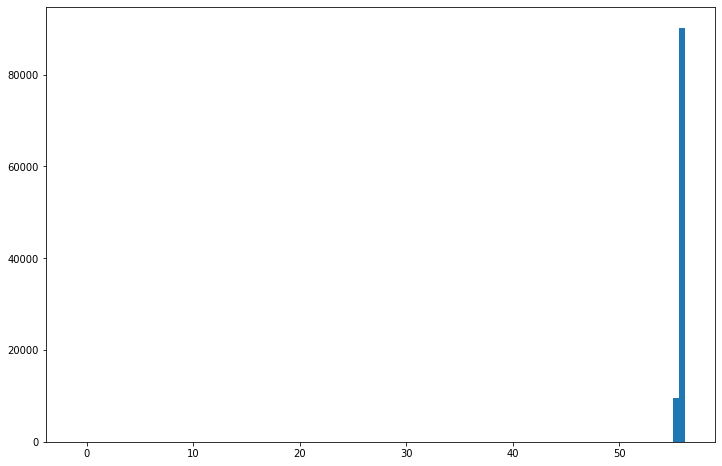

In [12]:
plt.figure(figsize=(12,8))
plt.hist(data['origin_order_latitude'],bins=100)

In [13]:
check = data[data['origin_order_latitude']<=0]

In [14]:
check

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1687,760201,6,17,1479,217451,55.730637,37.491326,-1.0,-1.0,2.942,6.300,Economy,private,1
9407,729617,1,21,1835,404650,55.484133,37.850971,-1.0,-1.0,-1.000,-1.000,Standard,private,0
43328,1033378,3,10,5586,386108,55.762383,37.772572,-1.0,-1.0,14.127,21.433,Economy,private,1
43688,299807,3,18,14,69484,55.640164,37.534014,-1.0,-1.0,9.998,22.133,Standard,private,1
51365,833482,0,20,75,782429,55.619920,37.395172,-1.0,-1.0,28.607,32.967,Economy,private,0
56004,1009826,3,19,4185,247078,55.758792,37.749308,-1.0,-1.0,11.281,21.167,Economy,private,1
58769,212838,2,7,6304,542162,55.638462,37.335678,-1.0,-1.0,48.557,47.300,Economy,private,0
60245,753313,1,16,1168,583148,55.984804,37.159184,-1.0,-1.0,-1.000,-1.000,Economy,private,1
64117,936069,5,15,737,139197,55.753351,37.667157,-1.0,-1.0,2.252,7.400,Standard,private,1
64694,1095202,3,20,5669,659570,55.741113,37.618121,-1.0,-1.0,7.199,20.200,Premium,private,1


In [15]:
check['origin_order_latitude'].value_counts()

-1.0    13
Name: origin_order_latitude, dtype: int64

#### отрицательные координаты заказа ( так же можем предпологать ошибку нафигации) можем классифицировать как выбросы, удаляем

In [16]:
data = data[data['origin_order_latitude'] >0]

In [17]:
data.describe().T #заодно убрали отрицательные значения origin_order_longitude

,count,mean,std,min,25%,50%,75%,max
offer_gk,99846.0,566160.583128,325938.821254,4.000000,285507.500000,565565.500000,848667.750000,1.130355e+06
weekday_key,99846.0,3.160087,2.054477,0.000000,1.000000,3.000000,5.000000,6.000000e+00
hour_key,99846.0,13.826633,7.308449,0.000000,8.000000,16.000000,20.000000,2.300000e+01
driver_gk,99846.0,3445.159676,2038.548277,14.000000,1421.000000,3506.000000,5242.000000,6.806000e+03
order_gk,99846.0,460917.356649,266050.549822,18.000000,229222.250000,462534.000000,690894.000000,9.203440e+05
driver_latitude,99846.0,55.780883,0.153851,55.327636,55.709285,55.773085,55.960697,5.617410e+01
driver_longitude,99846.0,37.546631,0.157053,36.984771,37.413497,37.533874,37.624235,3.828055e+01
origin_order_latitude,99846.0,55.780195,0.156106,55.327917,55.708502,55.772734,55.962035,5.617236e+01
origin_order_longitude,99846.0,37.546311,0.159887,36.994072,37.407117,37.532189,37.624145,3.824361e+01
distance_km,99846.0,18.411756,41.150869,-1.000000,-1.000000,10.441500,30.694750,5.234283e+03


In [18]:
data[data['distance_km'] <=0]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.0,-1.0,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.0,-1.0,Economy,private,1
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.0,-1.0,Standard,business,1
19,533917,5,8,6080,596531,55.913718,37.401395,55.921554,37.403505,-1.0,-1.0,Standard,business,0
21,123897,4,12,6080,185909,55.766763,37.607275,55.772388,37.606330,-1.0,-1.0,Standard,business,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,397745,1,23,2442,383092,55.961397,37.413560,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99987,871592,4,23,2442,802677,55.961121,37.414019,55.961995,37.406355,-1.0,-1.0,Standard,private,0
99991,619039,6,23,2442,323136,55.961239,37.413497,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99992,1021230,1,1,2442,351741,55.961301,37.413497,55.966694,37.415754,0.0,0.0,Standard,private,0


#### для отрицательных расстояний рассчитаем собственные значения по координатам

In [19]:


def get_distance(lat_1, lng_1, lat_2, lng_2):
    d_lat = lat_2 - lat_1
    d_lng = lng_2 - lng_1
    temp = (
    np.sin(d_lat / 2) ** 2
    + np.cos(lat_1)
    * np.cos(lat_2)
    * np.sin(d_lng / 2) ** 2
    )
    return 6373.0 * (2 * np.arctan2(np.sqrt(temp), np.sqrt(1 - temp)))


In [20]:
data['distance_km'][data['distance_km']<=0] = get_distance(data['driver_latitude'],
                                                               data['driver_longitude'],
                                                               data['origin_order_latitude'],
                                                              data['origin_order_longitude'])

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
offer_gk,99846.0,566160.583128,325938.821254,4.000000,285507.500000,565565.500000,848667.750000,1.130355e+06
weekday_key,99846.0,3.160087,2.054477,0.000000,1.000000,3.000000,5.000000,6.000000e+00
hour_key,99846.0,13.826633,7.308449,0.000000,8.000000,16.000000,20.000000,2.300000e+01
driver_gk,99846.0,3445.159676,2038.548277,14.000000,1421.000000,3506.000000,5242.000000,6.806000e+03
order_gk,99846.0,460917.356649,266050.549822,18.000000,229222.250000,462534.000000,690894.000000,9.203440e+05
driver_latitude,99846.0,55.780883,0.153851,55.327636,55.709285,55.773085,55.960697,5.617410e+01
driver_longitude,99846.0,37.546631,0.157053,36.984771,37.413497,37.533874,37.624235,3.828055e+01
origin_order_latitude,99846.0,55.780195,0.156106,55.327917,55.708502,55.772734,55.962035,5.617236e+01
origin_order_longitude,99846.0,37.546311,0.159887,36.994072,37.407117,37.532189,37.624145,3.824361e+01
distance_km,99846.0,35.519077,53.106453,0.000000,9.599250,24.808500,46.098350,5.234283e+03


#### Проверим заказы с расстоянием 0

In [22]:
data[data['distance_km']<=0]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
13511,713496,6,22,2291,294521,55.605226,37.286083,55.605226,37.286083,0.0,-1.0,Standard,private,1
13583,963833,6,22,2291,319408,55.605226,37.286083,55.605226,37.286083,0.0,-1.0,Standard,private,1
15286,389220,5,12,3860,422704,55.976109,37.319016,55.976109,37.319016,0.0,-1.0,Standard,private,0
16927,544936,0,19,5718,168026,55.962322,37.407117,55.962322,37.407117,0.0,-1.0,Standard,private,1
16929,823109,2,13,5718,45940,55.962322,37.407117,55.962322,37.407117,0.0,-1.0,Standard,private,0
16941,51503,1,20,5718,248361,55.962322,37.407117,55.962322,37.407117,0.0,-1.0,Standard,private,1
16987,33433,0,21,5718,840,55.962322,37.407117,55.962322,37.407117,0.0,-1.0,Economy,business,0
17027,1106841,0,21,5718,36751,55.962322,37.407117,55.962322,37.407117,0.0,-1.0,Economy,private,0
17044,528550,0,0,5718,628177,55.962322,37.407117,55.962322,37.407117,0.0,-1.0,Standard,private,1
17052,426000,0,16,5718,780962,55.962322,37.407117,55.962322,37.407117,0.0,-1.0,Economy,private,0


In [23]:
data['distance_km'][data['distance_km']<=0].value_counts()

0.0    47
Name: distance_km, dtype: int64

#### координаты заказчика и водителя полностью совпадают, возможно водители тестировали систему заказов. Можем удалить как выбросы.

In [24]:
data = data[data['distance_km']>0]

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
offer_gk,99799.0,566141.265824,325937.255422,4.000000,285461.500000,565574.000000,848658.500000,1.130355e+06
weekday_key,99799.0,3.160473,2.054277,0.000000,1.000000,3.000000,5.000000,6.000000e+00
hour_key,99799.0,13.827002,7.308027,0.000000,8.000000,16.000000,20.000000,2.300000e+01
driver_gk,99799.0,3444.175713,2038.230615,14.000000,1421.000000,3506.000000,5242.000000,6.806000e+03
order_gk,99799.0,460943.907103,266044.613384,18.000000,229249.000000,462559.000000,690920.000000,9.203440e+05
driver_latitude,99799.0,55.780804,0.153836,55.327636,55.709254,55.773043,55.960672,5.617410e+01
driver_longitude,99799.0,37.546698,0.157057,36.984771,37.413497,37.533942,37.624272,3.828055e+01
origin_order_latitude,99799.0,55.780115,0.156092,55.327917,55.708492,55.772666,55.962002,5.617236e+01
origin_order_longitude,99799.0,37.546378,0.159893,36.994072,37.407117,37.532457,37.624164,3.824361e+01
distance_km,99799.0,35.535804,53.113361,0.003741,9.616000,24.838000,46.114233,5.234283e+03


#### Проанализируем время поездок <= 0

In [26]:
data['duration_min'][data['duration_min']<=0].value_counts()

-1.0    26036
 0.0      152
Name: duration_min, dtype: int64

#### рассчитаем значение длительности поездки для этих данных как среднее время на 1 км * расстояние

In [27]:
mean_t=np.mean(data['duration_min'][data['duration_min']>0]/data['distance_km'][data['duration_min']>0])

In [28]:
data['duration_min'][data['duration_min']<=0] = data['distance_km'] *mean_t

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
offer_gk,99799.0,566141.265824,325937.255422,4.000000,285461.500000,565574.000000,848658.500000,1.130355e+06
weekday_key,99799.0,3.160473,2.054277,0.000000,1.000000,3.000000,5.000000,6.000000e+00
hour_key,99799.0,13.827002,7.308027,0.000000,8.000000,16.000000,20.000000,2.300000e+01
driver_gk,99799.0,3444.175713,2038.230615,14.000000,1421.000000,3506.000000,5242.000000,6.806000e+03
order_gk,99799.0,460943.907103,266044.613384,18.000000,229249.000000,462559.000000,690920.000000,9.203440e+05
driver_latitude,99799.0,55.780804,0.153836,55.327636,55.709254,55.773043,55.960672,5.617410e+01
driver_longitude,99799.0,37.546698,0.157057,36.984771,37.413497,37.533942,37.624272,3.828055e+01
origin_order_latitude,99799.0,55.780115,0.156092,55.327917,55.708492,55.772666,55.962002,5.617236e+01
origin_order_longitude,99799.0,37.546378,0.159893,36.994072,37.407117,37.532457,37.624164,3.824361e+01
distance_km,99799.0,35.535804,53.113361,0.003741,9.616000,24.838000,46.114233,5.234283e+03


(array([1.458e+03, 4.709e+03, 6.445e+03, 7.250e+03, 7.190e+03, 7.225e+03,
        6.371e+03, 5.722e+03, 5.067e+03, 4.792e+03, 4.554e+03, 4.856e+03,
        5.003e+03, 3.612e+03, 3.535e+03, 2.730e+03, 2.405e+03, 1.299e+03,
        1.048e+03, 9.640e+02, 6.550e+02, 5.550e+02, 5.900e+02, 5.830e+02,
        7.380e+02, 3.890e+02, 4.100e+02, 3.560e+02, 3.050e+02, 2.980e+02,
        3.290e+02, 3.110e+02, 3.010e+02, 2.460e+02, 2.930e+02, 3.200e+02,
        2.540e+02, 2.100e+02, 2.280e+02, 2.070e+02, 2.090e+02, 2.120e+02,
        1.770e+02, 1.860e+02, 1.740e+02, 1.660e+02, 1.540e+02, 1.440e+02,
        1.720e+02, 1.390e+02, 1.430e+02, 1.300e+02, 1.450e+02, 1.160e+02,
        1.280e+02, 1.280e+02, 1.120e+02, 1.110e+02, 1.090e+02, 1.030e+02,
        9.100e+01, 1.020e+02, 1.120e+02, 1.090e+02, 9.500e+01, 8.800e+01,
        7.500e+01, 8.400e+01, 6.500e+01, 6.200e+01, 7.200e+01, 5.700e+01,
        5.500e+01, 1.080e+02, 1.020e+02, 9.500e+01, 8.100e+01, 6.600e+01,
        5.700e+01, 2.800e+01, 5.300e+0

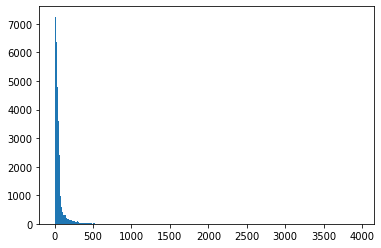

In [30]:
plt.hist(data['duration_min'],bins=1000)

In [31]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,100.691565,175.048095,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802000,25.217000,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747000,9.800000,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,44.333992,77.072800,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383000,19.250000,Economy,private,1


#### Переведем категориальный столбец offer_class_group в индикаторы  для каждой строки

In [34]:
data['offer_class_group'].unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

In [36]:
len(data[data['offer_class_group']=='Test'])

8

#### Найдено 8 тестовых заказов, удаляем их из анализа

In [38]:
data = data[data['offer_class_group'] !='Test']

In [39]:
data1 = pd.concat([data,pd.get_dummies(data['offer_class_group'],prefix ='cg')],axis=1)

In [41]:
data = data1

In [43]:
data = data.drop(['offer_class_group'],axis=1)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99791 entries, 0 to 99999
Data columns (total 21 columns):
offer_gk                  99791 non-null int64
weekday_key               99791 non-null int64
hour_key                  99791 non-null int64
driver_gk                 99791 non-null int64
order_gk                  99791 non-null int64
driver_latitude           99791 non-null float64
driver_longitude          99791 non-null float64
origin_order_latitude     99791 non-null float64
origin_order_longitude    99791 non-null float64
distance_km               99791 non-null float64
duration_min              99791 non-null float64
ride_type_desc            99791 non-null object
driver_response           99791 non-null int64
cg_Delivery               99791 non-null uint8
cg_Economy                99791 non-null uint8
cg_Kids                   99791 non-null uint8
cg_Premium                99791 non-null uint8
cg_Standard               99791 non-null uint8
cg_VIP                    99791 

#### Переведем категориальный столбец ride_type_desc в индикаторы для каждой строки


In [45]:
data['ride_type_desc'].unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

In [46]:
data2 = pd.concat([data,pd.get_dummies(data['ride_type_desc'],prefix='rt')],axis=1)

In [47]:
data2.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,...,cg_Kids,cg_Premium,cg_Standard,cg_VIP,cg_VIP+,cg_XL,rt_SMB,rt_affiliate,rt_business,rt_private
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,100.691565,...,0,0,0,0,0,0,0,0,0,1
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802000,...,0,0,1,0,0,0,0,0,0,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747000,...,0,0,0,0,0,0,0,0,0,1
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,44.333992,...,0,0,0,0,0,0,0,0,0,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383000,...,0,0,0,0,0,0,0,0,0,1


In [48]:
data=data2

In [103]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
offer_gk,99791.0,566115.768486,325927.807260,4.000000,285450.500000,565559.000000,848610.500000,1.130355e+06
weekday_key,99791.0,3.160475,2.054309,0.000000,1.000000,3.000000,5.000000,6.000000e+00
hour_key,99791.0,13.826608,7.308133,0.000000,8.000000,16.000000,20.000000,2.300000e+01
driver_gk,99791.0,3444.216021,2038.206782,14.000000,1421.000000,3506.000000,5242.000000,6.806000e+03
order_gk,99791.0,460956.487048,266047.980320,18.000000,229249.000000,462571.000000,690946.000000,9.203440e+05
driver_latitude,99791.0,55.780798,0.153840,55.327636,55.709244,55.773037,55.960673,5.617410e+01
driver_longitude,99791.0,37.546697,0.157061,36.984771,37.413497,37.533941,37.624268,3.828055e+01
origin_order_latitude,99791.0,55.780110,0.156096,55.327917,55.708491,55.772666,55.962002,5.617236e+01
origin_order_longitude,99791.0,37.546376,0.159897,36.994072,37.407117,37.532453,37.624156,3.824361e+01
distance_km,99791.0,35.532734,53.111144,0.003741,9.615000,24.835029,46.111500,5.234283e+03


In [50]:
from pandas_profiling import ProfileReport as pr

In [52]:
profile = pr(data,title='Taxi', html={'style':{'full_width':True}})

In [159]:
profile.to_widgets()

#### Наблюдается высокая корреляция между следующими данными : driver_latitude - origin_order_latitude, 
#### driver_longitude - origin_order_longitude, duration_minutes - distance_km. Для дальнейшего анализа будем использовать
#### origin_order_latitude,origin_order_longitude и distance_km как основные для даных пар переменных.

#### построим модель предсказания на очищенных данных

In [61]:
from sklearn.model_selection import train_test_split as tts

In [144]:
params = data[['distance_km','cg_Kids','origin_order_longitude','cg_VIP+','order_gk','driver_gk','offer_gk',
               'cg_XL','origin_order_latitude','cg_Standard','weekday_key','cg_VIP','cg_Delivery','cg_Economy',
               'cg_Premium','hour_key']]


In [145]:
result = data[['driver_response']]

In [146]:
params_train, params_test, result_train, result_test = tts(params, result, test_size=0.25, random_state= 42)

In [70]:
!pip install xgboost

In [147]:
import xgboost
from sklearn.metrics import accuracy_score  

In [148]:
calculation = xgboost.XGBClassifier()

In [149]:
calculation.fit(params_train,result_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [151]:
res_predict = calculation.predict(params_test)

In [158]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(result_test, res_predict)
print(accuracy)

0.8288840788840789


#### Итоговая точность модели составляет 82,8%